# Machine Learning Notebook
<a id='header_cell'></a>
Author: Aidan O'Connor   
Date: 21 May 2021   

### Table of Contents:
- [Header Cell](#header_cell)

## Import Packages and Read in Data

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database as
    specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [3]:
conn = create_connection('../../fixtures/database/cloudy_with_a_chance_of_football.db')

In [4]:
cursorObj = conn.cursor()

In [5]:
cursorObj.execute('SELECT name from sqlite_master where type = "table"')
print(cursorObj.fetchall())

[('positions',), ('player_dob',), ('players',), ('player_team',), ('player_age',), ('team_home_time_zone',), ('injury_status',), ('days_since_last_game',), ('weather',), ('hours_displaced',), ('stats_regular',), ('stats_red_zone',), ('elevation_and_conference',)]


In [7]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [40]:
df = pd.read_sql_query(
        "SELECT * FROM players limit 5", conn)

In [41]:
df

,PlayerID,FirstName,LastName,uniqueID
0,14891,Tommy,Bohanon,tommybohanon
1,22268,Will,Sunderland,willsunderland
2,22276,DeMichael,Harris,demichaelharris
3,22277,Carter,O'Donnell,cartero'donnell
4,17457,Nick,Easton,nickeaston


In [38]:
df1 = pd.read_sql_query(
        "SELECT * FROM players", conn)

In [39]:
df1 = df1.merge(df, how = 'left')

In [40]:
df1[df1['injury_status'].isna()]

,PlayerID,FirstName,LastName,uniqueID,week_id,injury_status
0,14891,Tommy,Bohanon,tommybohanon,NaN,NaN
1,22268,Will,Sunderland,willsunderland,NaN,NaN
2,22276,DeMichael,Harris,demichaelharris,NaN,NaN
3,22277,Carter,O'Donnell,cartero'donnell,NaN,NaN
4,17457,Nick,Easton,nickeaston,NaN,NaN
...,...,...,...,...,...,...
3923,19326,Cole,Hikutini,colehikutini,NaN,NaN
3924,19766,Saquon,Barkley,saquonbarkley,2018_1,None
3925,21433,Blake,Blackmar,blakeblackmar,NaN,NaN
3926,21434,Spencer,Schnell,spencerschnell,NaN,NaN


In [44]:
df[df['PlayerID'] == 19766]

,PlayerID,week_id,injury_status
39,19766,2018_1,None


In [ ]:
df = df.set_index('PlayerID')

In [ ]:
df

In [ ]:
df.nunique()

In [ ]:
df.hist('time_zone_daylight_savings')

In [ ]:
df1 = pd.read_sql_query("SELECT PlayerID FROM hours_displaced, stats_regular, limit 500", conn)

In [ ]:
df1

In [14]:
df = pd.read_sql_query("SELECT * FROM stats_regular", conn)

In [15]:
df

,PlayerID,week_id,Team,Opponent,HomeOrAway,Number,Name,Position,PositionCategory,Played,...,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID
0,2593,2018_1,GB,CHI,HOME,12,Aaron Rodgers,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,20.86,Probable,12,6,16667
1,7242,2018_1,NO,TB,HOME,9,Drew Brees,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,20.37,None,22,33,16660
2,4314,2018_1,NE,HOU,HOME,12,Tom Brady,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,19.96,None,21,13,16659
3,18857,2018_1,HOU,NE,AWAY,4,Deshaun Watson,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,19.87,Questionable,13,21,16659
4,16771,2018_1,LAR,LV,AWAY,30,Todd Gurley,RB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,22.74,None,32,25,16669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78999,22477,2020_17,GB,CHI,AWAY,49,Dominique Dafney,TE,OFF,0,...,NaN,NaN,NaN,NaN,NaN,0.00,None,12,6,17504
79000,22482,2020_17,NYJ,NE,AWAY,6,Sergio Castillo,K,ST,1,...,NaN,NaN,NaN,NaN,NaN,0.00,None,24,21,17510
79001,22485,2020_17,DEN,LV,HOME,1,Taylor Russolino,K,ST,0,...,NaN,NaN,NaN,NaN,NaN,0.00,None,10,25,17516
79002,21295,2020_17,LAR,ARI,HOME,14,Nsimba Webster,WR,OFF,1,...,0.0,0.0,0.0,0.0,0.0,0.14,None,32,1,17517


In [48]:
list(df)

['PlayerID',
 'week_id',
 'Team',
 'Opponent',
 'HomeOrAway',
 'Number',
 'Name',
 'Position',
 'PositionCategory',
 'Played',
 'Started',
 'PassingAttempts',
 'PassingCompletions',
 'PassingYards',
 'PassingCompletionPercentage',
 'PassingYardsPerAttempt',
 'PassingYardsPerCompletion',
 'PassingTouchdowns',
 'PassingInterceptions',
 'PassingRating',
 'PassingLong',
 'PassingSacks',
 'PassingSackYards',
 'RushingAttempts',
 'RushingYards',
 'RushingYardsPerAttempt',
 'RushingTouchdowns',
 'RushingLong',
 'ReceivingTargets',
 'Receptions',
 'ReceivingYards',
 'ReceivingYardsPerReception',
 'ReceivingTouchdowns',
 'ReceivingLong',
 'Fumbles',
 'FumblesLost',
 'PuntReturns',
 'PuntReturnYards',
 'PuntReturnTouchdowns',
 'KickReturns',
 'KickReturnYards',
 'KickReturnTouchdowns',
 'SoloTackles',
 'AssistedTackles',
 'TacklesForLoss',
 'Sacks',
 'SackYards',
 'QuarterbackHits',
 'PassesDefended',
 'FumblesForced',
 'FumblesRecovered',
 'FumbleReturnTouchdowns',
 'Interceptions',
 'Intercept

<AxesSubplot:>

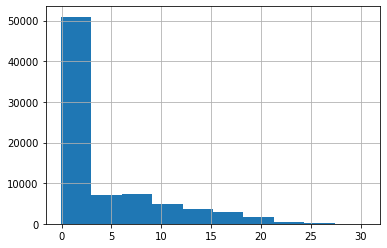

In [16]:
df['FantasyPointsDraftKings'].hist()

In [12]:
df

,PlayerID,week_id,Team,Opponent,HomeOrAway,Number,Name,Position,PositionCategory,Played,...,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,InjuryStatus,TeamID,OpponentID,ScoreID
0,2593,2018_1,GB,CHI,HOME,12,Aaron Rodgers,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,20.86,Probable,12,6,16667
1,7242,2018_1,NO,TB,HOME,9,Drew Brees,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,20.37,None,22,33,16660
2,4314,2018_1,NE,HOU,HOME,12,Tom Brady,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,19.96,None,21,13,16659
3,18857,2018_1,HOU,NE,AWAY,4,Deshaun Watson,QB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,19.87,Questionable,13,21,16659
4,16771,2018_1,LAR,LV,AWAY,30,Todd Gurley,RB,OFF,1,...,0.0,0.0,0.0,0.0,0.0,22.74,None,32,25,16669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78999,22477,2020_17,GB,CHI,AWAY,49,Dominique Dafney,TE,OFF,0,...,NaN,NaN,NaN,NaN,NaN,0.00,None,12,6,17504
79000,22482,2020_17,NYJ,NE,AWAY,6,Sergio Castillo,K,ST,1,...,NaN,NaN,NaN,NaN,NaN,0.00,None,24,21,17510
79001,22485,2020_17,DEN,LV,HOME,1,Taylor Russolino,K,ST,0,...,NaN,NaN,NaN,NaN,NaN,0.00,None,10,25,17516
79002,21295,2020_17,LAR,ARI,HOME,14,Nsimba Webster,WR,OFF,1,...,0.0,0.0,0.0,0.0,0.0,0.14,None,32,1,17517


Todo:
- Add ffdp data to database (proj and actual) (Aidan)
- Inner join all tables on week_id and player_id (Ermina)
- All create machine learning notebooks
    - Global/Defense (Aidan)
    - QB (Yaphet)
    - RB/WR (Griffin)
    - TE/K (Ermina)
- Create a "class" of fantasy points scorers (low/high/etc) (Aidan) (split into quartiles)
- Fill in progress report (All)
- Add dataproscleaner to database and fuzzy match on player name (Aidan)
- Push carter's notebooks (Aidan)

In [21]:
df2 = pd.read_csv('../../fixtures/cleaned_data/datapros_cleaner.csv')

In [22]:
df2

,Unnamed: 0,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1,-5.215309
1,1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0,2.731030
2,2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1,-0.746106
3,3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0,0.164436
4,4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1,-7.804130
...,...,...,...,...,...,...,...,...,...,...
2572,2572,2019_16,austinekeler,Austin Ekeler,flex,0,16.054582,11.90,1,-4.154582
2573,2573,2019_16,terrymclaurin,Terry McLaurin,bench,1,12.657177,15.60,0,2.942823
2574,2574,2019_16,jameiswinston,Jameis Winston,qb,1,19.503190,11.00,1,-8.503190
2575,2575,2019_16,davidmontgomery,David Montgomery,bench,0,11.467978,6.90,1,-4.567978


In [23]:
df['Name']

0           Aaron Rodgers
1              Drew Brees
2               Tom Brady
3          Deshaun Watson
4             Todd Gurley
               ...       
78999    Dominique Dafney
79000     Sergio Castillo
79001    Taylor Russolino
79002      Nsimba Webster
79003          Josh Rosen
Name: Name, Length: 79004, dtype: object

In [31]:
df['fuzzy_name'] = [n.lower() for n in df['Name']]

In [32]:
df['fuzzy_name'] = [n.replace(' ','') for n in df['fuzzy_name']]

In [33]:
df['fuzzy_name']

0           aaronrodgers
1              drewbrees
2               tombrady
3          deshaunwatson
4             toddgurley
              ...       
78999    dominiquedafney
79000     sergiocastillo
79001    taylorrussolino
79002      nsimbawebster
79003          joshrosen
Name: fuzzy_name, Length: 79004, dtype: object

<AxesSubplot:>

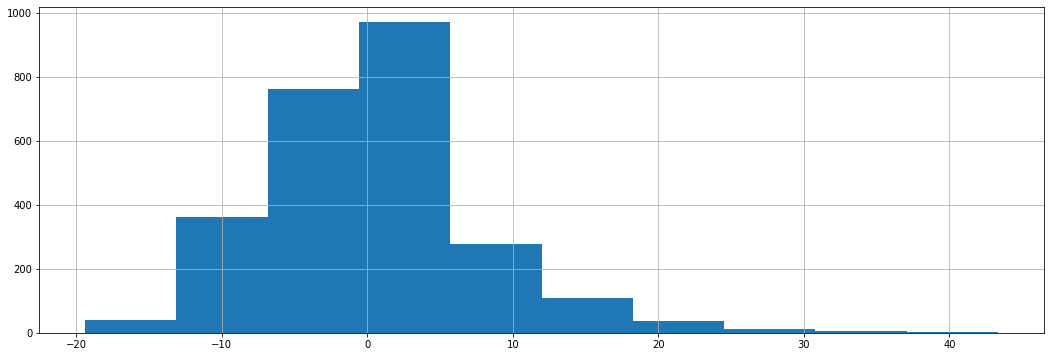

In [37]:
df2['performance_difference'].hist(figsize=(18,6))